Boosting

In [3]:
import pandas as pd
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
#Biblioteca de visualização de plots
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/DarkMatter/dataset_criancas_V3.csv')

In [ ]:
df.head(5) #Primeiras 5 linhas do dataset

,qseqid,length,GC,Pico_P2A,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,TT_ORF2,...,Pneumovirus_M2,RSV_NS2,zf-CCCH_2,DUF755,Calici_coat,TMP_3,DUF4355,Baculo_PEP_C,Sipho_Gp157,taxname
0,NODE_563_length_2462_cov_2477.158491,2462,36.83,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Enterovirus
1,NODE_5193_length_554_cov_20.345912,554,31.23,0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,RSV
2,NODE_531_length_2579_cov_6.050759,2579,32.29,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
3,NODE_492_length_2724_cov_8.943332,2724,31.90,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
4,NODE_3608_length_1124_cov_17.769819,1124,56.49,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,TTV


In [ ]:
df = df.drop('qseqid',axis =1) #retirar coluna dos IDs
df.head()

,length,GC,Pico_P2A,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,TT_ORF2,TT_ORF1,...,Pneumovirus_M2,RSV_NS2,zf-CCCH_2,DUF755,Calici_coat,TMP_3,DUF4355,Baculo_PEP_C,Sipho_Gp157,taxname
0,2462,36.83,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Enterovirus
1,554,31.23,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,RSV
2,2579,32.29,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
3,2724,31.90,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
4,1124,56.49,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,TTV


In [ ]:
from sklearn.model_selection import train_test_split

y = df['taxname']
X = df.drop("taxname", axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (72, 39)
Shape of Test Features: (25, 39)
Shape of Train Target: (72,)
Shape of Test Target: (25,)


In [ ]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

#X_train_encoded = label_encoder.fit_transform(X_train)
#X_test_encoded = label_encoder.fit_transform(X_test)

boosted_model = xgb.XGBClassifier()
boosted_model.fit(X_train, y_train_encoded)

# Avaliar o desempenho do modelo XGBoost
accuracy_boosted = boosted_model.score(X_test, y_test_encoded)
print("Accuracy XGBoost:", accuracy_boosted)

Accuracy XGBoost: 0.92


In [ ]:
thresholds = sort(boosted_model.feature_importances_)
thresholds

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0305537 , 0.04388146, 0.04437404, 0.04679799, 0.04993123,
       0.06113195, 0.20711476, 0.23958509, 0.27662978], dtype=float32)

In [ ]:
thresholds = sort(boosted_model.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(boosted_model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_train_encoded)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 accuracy = accuracy_score(y_test_encoded, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%
Thresh=0.000, n=39, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.031, n=9, Accuracy: 92.00%
Thresh=0.044, n=8, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.044, n=7, Accuracy: 92.00%
Thresh=0.047, n=6, Accuracy: 92.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.050, n=5, Accuracy: 88.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.061, n=4, Accuracy: 88.00%
Thresh=0.207, n=3, Accuracy: 64.00%
Thresh=0.240, n=2, Accuracy: 56.00%
Thresh=0.277, n=1, Accuracy: 56.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
predictions_xgb = boosted_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix, recall_score
accuracy_test = accuracy_score(y_test_encoded, predictions_xgb)
#accuracy_train = accuracy_score(y_train_encoded, predictions_xgb)
precision = precision_score(y_test_encoded, predictions_xgb, average='weighted')
recall = recall_score(y_test_encoded, predictions_xgb, average='weighted')
f1 = f1_score(y_test_encoded, predictions_xgb, average='weighted')
mcc = matthews_corrcoef(y_test_encoded, predictions_xgb)
conf_matrix = confusion_matrix(y_test_encoded, predictions_xgb)


#print(f'Acurácia no conjunto de treino: {accuracy_train:.2f}')
print(f'Acurácia no conjunto de teste: {accuracy_test:.2f}')
print(f'F1 no conjunto de teste: {f1:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Revocação no conjunto de teste: {recall}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')
#print(conf_matrix)

Acurácia no conjunto de teste: 0.92
F1 no conjunto de teste: 0.92
Precisão no conjunto de teste: 0.93
Revocação no conjunto de teste: 0.92
Coeficiente de Correlação de Mattwes: 0.89
[[3 1 0 0]
 [0 8 0 1]
 [0 0 5 0]
 [0 0 0 7]]


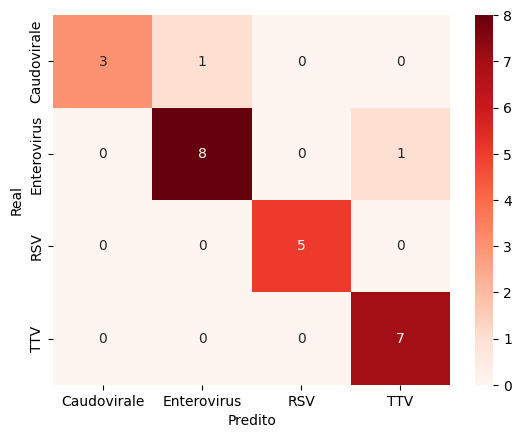

In [ ]:
cm = confusion_matrix(y_test_encoded, predictions_xgb)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = "Real"

df_cm.columns.name = "Predito"

sns.heatmap(df_cm, annot=True, cmap = "Reds")
plt.show()

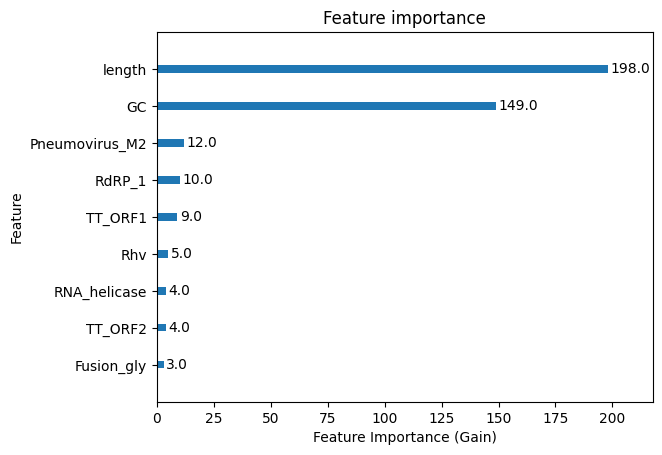

In [ ]:
#xgb.plot_importance(boosted_model)
xgb.plot_importance(boosted_model, grid=False)  # Set grid=False to remove the grid
plt.xlabel("Feature Importance (Gain)")  # Clarify the x-axis label
plt.ylabel("Feature")
plt.show()

In [ ]:
importance = boosted_model.feature_importances_
print(importance)

[0.02441952 0.03998359 0.         0.03495101 0.         0.
 0.         0.         0.04487463 0.04684869 0.         0.
 0.         0.24819358 0.31412786 0.041699   0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.20490216 0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, predictions_xgb))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.89      0.89      0.89         9
           2       1.00      1.00      1.00         5
           3       0.88      1.00      0.93         7

    accuracy                           0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25



In [ ]:
labels = set(y_test_encoded)  # Todas as classes presentes

# Inicializando dicionários para armazenar métricas por classe
accuracy_per_class = {}
mcc_per_class = {}

for label in labels:
    # Converting the problem to binary: positive (current class) vs negative (all other classes)
    y_test_bin = [1 if y == label else 0 for y in y_test_encoded]
    y_pred_bin = [1 if y == label else 0 for y in predictions_xgb]

    # Calculando acurácia para a classe atual
    accuracy_per_class[label] = accuracy_score(y_test_bin, y_pred_bin)

    # Calculando MCC para a classe atual
    mcc_per_class[label] = matthews_corrcoef(y_test_bin, y_pred_bin)

# Exibindo resultados
print("Acurácia por Classe:")
for label, acc in accuracy_per_class.items():
    print(f"Classe {label}: {acc:.2f}")

print("\nMCC por Classe:")
for label, mcc in mcc_per_class.items():
    print(f"Classe {label}: {mcc:.2f}")

Acurácia por Classe:
Classe 0: 0.96
Classe 1: 0.92
Classe 2: 1.00
Classe 3: 0.96

MCC por Classe:
Classe 0: 0.85
Classe 1: 0.83
Classe 2: 1.00
Classe 3: 0.91


In [ ]:
test = pd.read_excel('/content/drive/MyDrive/DarkMatter/test_set.xlsx')

In [ ]:
y_new = test['taxname']
X_new = test.drop("taxname", axis=1)

In [ ]:
y_new_encoded = label_encoder.fit_transform(y_new)

In [ ]:
y_hat = boosted_model.predict(X_new)

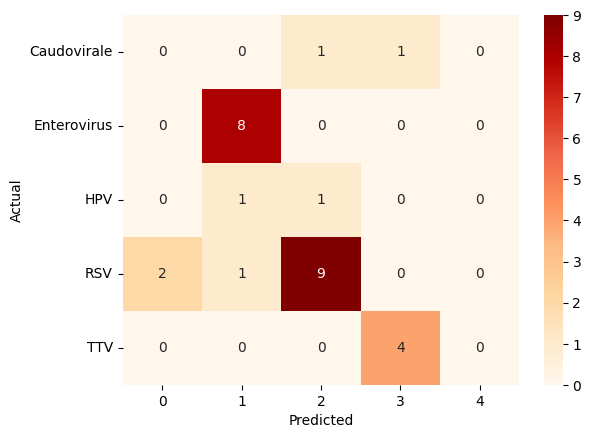

In [ ]:
cm = confusion_matrix(y_new_encoded, y_hat)

df_cm = pd.DataFrame(cm, columns=np.unique(y_new_encoded), index = np.unique(y_new))

df_cm.index.name = "Actual"

df_cm.columns.name = "Predicted"

sns.heatmap(df_cm, annot=True, cmap = "OrRd")
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_new_encoded, y_hat)

f1 = f1_score(y_new_encoded, y_hat, average = 'weighted')
precision = precision_score(y_new_encoded,y_hat, average= 'weighted')
mcc = matthews_corrcoef(y_new_encoded, y_hat)

print(f'Acurácia no conjunto de teste 3: {accuracy_test}')
print(f'F1 no conjunto de teste 3: {f1:.2f}')
print(f'Precisão no conjunto de teste 3: {precision:.2f}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

Acurácia no conjunto de teste 3: 0.32142857142857145
F1 no conjunto de teste 3: 0.26
Precisão no conjunto de teste 3: 0.24
Coeficiente de Correlação de Mattwes: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test = test.drop(test[(test['taxname'] == "HPV")].index)

In [ ]:
y_new = test['taxname']
X_new = test.drop("taxname", axis=1)

In [ ]:
y_new_encoded = label_encoder.fit_transform(y_new)
y_hat = boosted_model.predict(X_new)

In [ ]:
y_hat

array([0, 0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2])

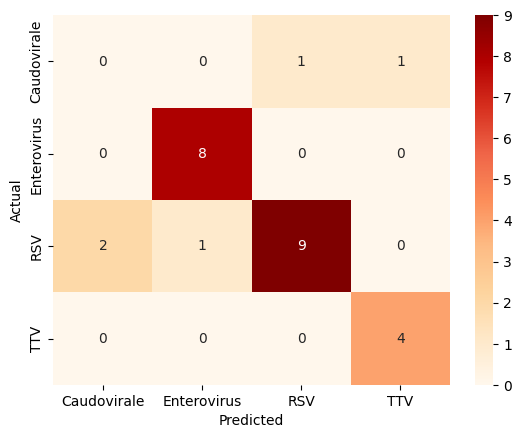

In [ ]:
cm = confusion_matrix(y_new_encoded, y_hat)

df_cm = pd.DataFrame(cm, columns=np.unique(y_new), index = np.unique(y_new))

df_cm.index.name = "Actual"

df_cm.columns.name = "Predicted"

sns.heatmap(df_cm, annot=True, cmap = "OrRd")
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_new_encoded, y_hat)

f1 = f1_score(y_new_encoded, y_hat, average = 'weighted')
precision = precision_score(y_new_encoded,y_hat, average= 'weighted')
mcc = matthews_corrcoef(y_new_encoded, y_hat)

print(f'Acurácia no conjunto de teste 3: {accuracy_test}')
print(f'F1 no conjunto de teste 3: {f1:.2f}')
print(f'Precisão no conjunto de teste 3: {precision:.2f}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

Acurácia no conjunto de teste 3: 0.8076923076923077
F1 no conjunto de teste 3: 0.80
Precisão no conjunto de teste 3: 0.81
Coeficiente de Correlação de Mattwes: 0.72


In [24]:
#!pip install lightgbm --upgrade #Update LightGBM to the latest version

import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
df.head()

,length,GC,Pico_P2A,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,TT_ORF2,TT_ORF1,...,Pneumovirus_M2,RSV_NS2,zf-CCCH_2,DUF755,Calici_coat,TMP_3,DUF4355,Baculo_PEP_C,Sipho_Gp157,taxname
0,2462,36.83,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Enterovirus
1,554,31.23,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,RSV
2,2579,32.29,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
3,2724,31.90,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
4,1124,56.49,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,TTV


In [7]:
df = df.drop('qseqid',axis =1) #retirar coluna dos IDs
df.head()
y = df['taxname']
X = df.drop("taxname", axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (72, 39)
Shape of Test Features: (25, 39)
Shape of Train Target: (72,)
Shape of Test Target: (25,)


In [27]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use transform, not fit_transform for test data

# Create LightGBM datasets with encoded labels
train_data = lgb.Dataset(X_train, label=y_train_encoded) # Use y_train_encoded
test_data = lgb.Dataset(X_test, label=y_test_encoded, reference=train_data) # Use y_test_encoded

In [28]:
params = {
    'objective': 'multiclass',
    'metric': 'multi_error',
    'num_class': len(np.unique(y_train_encoded))
}

In [31]:
model_lgb = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 2
[LightGBM] [Info] Start training from score -1.504077
[LightGBM] [Info] Start training from score -1.280934
[LightGBM] [Info] Start training from score -1.878771
[LightGBM] [Info] Start training from score -1.057790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

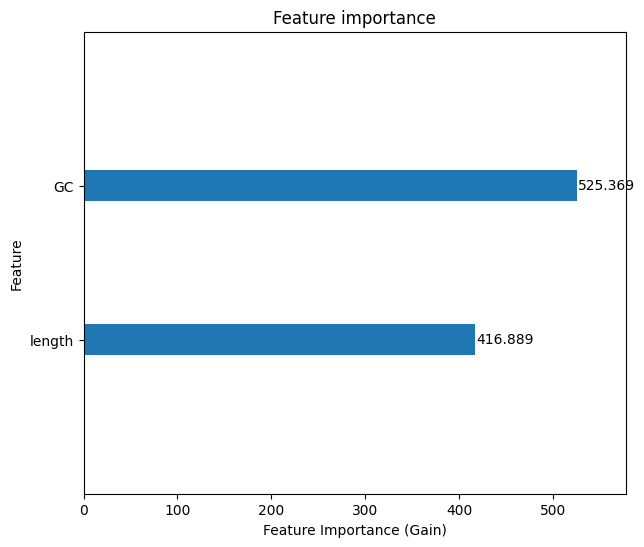

In [44]:
lgb.plot_importance(model_lgb, grid=False,importance_type="gain", figsize=(7,6))  # Set grid=False to remove the grid
plt.xlabel("Feature Importance (Gain)")  # Clarify the x-axis label
plt.ylabel("Feature")
plt.show()

In [52]:
interactions = model_lgb.feature_importance(importance_type='split', iteration=None)

# Display top interactions (Note: This will show individual feature importances, not interactions)
sorted_idx = np.argsort(interactions)[::-1]
for idx in sorted_idx[:10]:
    print(f"Feature {idx} - Importance: {interactions[idx]}")

Feature 1 - Importance: 422
Feature 0 - Importance: 419
Feature 9 - Importance: 0
Feature 16 - Importance: 0
Feature 15 - Importance: 0
Feature 14 - Importance: 0
Feature 13 - Importance: 0
Feature 12 - Importance: 0
Feature 11 - Importance: 0
Feature 10 - Importance: 0


In [33]:
y_pred = model_lgb.predict(X_test)
accuracy_lgb = np.mean(np.argmax(y_pred, axis=1) == y_test_encoded)
print("Accuracy LightGBM:", accuracy_lgb)

Accuracy LightGBM: 0.92


In [39]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix, recall_score
# Precisão e Revocação
precision = precision_score(y_test_encoded, np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(y_test_encoded, np.argmax(y_pred, axis=1), average='weighted')

# F1-score
f1 = f1_score(y_test_encoded, np.argmax(y_pred, axis=1), average='weighted')

# MCC (Matthews Correlation Coefficient)
mcc = matthews_corrcoef(y_test_encoded, np.argmax(y_pred, axis=1))

print(f'Acurácia no conjunto de teste: {accuracy_lgb:.2f}')
print(f'F1 no conjunto de teste: {f1:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Revocação no conjunto de teste: {recall}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')
#print("Confusion Matrix:\n", conf_matrix)

Acurácia no conjunto de teste: 0.92
F1 no conjunto de teste: 0.92
Precisão no conjunto de teste: 0.93
Revocação no conjunto de teste: 0.92
Coeficiente de Correlação de Mattwes: 0.89


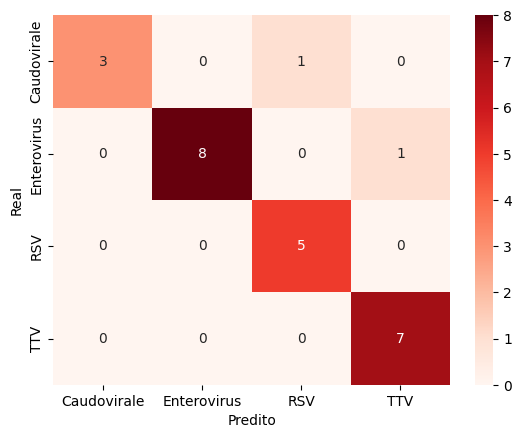

In [46]:
cm = confusion_matrix(y_test_encoded, np.argmax(y_pred, axis=1))

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = "Real"

df_cm.columns.name = "Predito"

sns.heatmap(df_cm, annot=True, cmap = "Reds")
plt.show()

In [57]:
from sklearn.metrics import classification_report
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
print(classification_report(y_test_encoded, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      0.89      0.94         9
           2       0.83      1.00      0.91         5
           3       0.88      1.00      0.93         7

    accuracy                           0.92        25
   macro avg       0.93      0.91      0.91        25
weighted avg       0.93      0.92      0.92        25



In [72]:
labels = set(y_test_encoded)  # Todas as classes presentes

# Inicializando dicionários para armazenar métricas por classe
accuracy_per_class = {}
mcc_per_class = {}

for label in labels:
    # Converting the problem to binary: positive (current class) vs negative (all other classes)
    y_test_bin = [1 if y == label else 0 for y in y_test_encoded]

    # Find the predicted class for each sample (index of maximum probability)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compare predicted class to current label for binary conversion
    y_pred_bin = [1 if pred == label else 0 for pred in y_pred_classes]

    # Calculando acurácia para a classe atual
    accuracy_per_class[label] = accuracy_score(y_test_bin, y_pred_bin)
    print("Acurácia por Classe:", accuracy_per_class)
    # Calculando MCC para a classe atual
    mcc_per_class[label] = matthews_corrcoef(y_test_bin, y_pred_bin)
    print("MCC por Classe:", mcc_per_class)



Acurácia por Classe: {0: 0.96}
MCC por Classe: {0: 0.8461141122266493}
Acurácia por Classe: {0: 0.96, 1: 0.96}
MCC por Classe: {0: 0.8461141122266493, 1: 0.9146591207600472}
Acurácia por Classe: {0: 0.96, 1: 0.96, 2: 0.96}
MCC por Classe: {0: 0.8461141122266493, 1: 0.9146591207600472, 2: 0.8897565210026094}
Acurácia por Classe: {0: 0.96, 1: 0.96, 2: 0.96, 3: 0.96}
MCC por Classe: {0: 0.8461141122266493, 1: 0.9146591207600472, 2: 0.8897565210026094, 3: 0.9090593428863095}


In [ ]:
test = pd.read_excel('/content/drive/MyDrive/DarkMatter/test_set.xlsx')
test = test.drop(test[(test['taxname'] == "HPV")].index)

In [ ]:
y_new = test['taxname']
X_new = test.drop("taxname", axis=1)

In [ ]:
y_new_encoded = label_encoder.fit_transform(y_new)

In [ ]:
y_hat = model_lgb.predict(X_new)

In [ ]:
# Precisão
precision = precision_score(y_new_encoded, np.argmax(y_hat, axis=1), average='weighted')

# F1-score
f1 = f1_score(y_new_encoded, np.argmax(y_hat, axis=1), average='weighted')

# MCC (Matthews Correlation Coefficient)
mcc = matthews_corrcoef(y_new_encoded, np.argmax(y_hat, axis=1))

print("Precisão:", precision)
print("F1-score:", f1)
print("MCC:", mcc)
#print("Confusion Matrix:\n", conf_matrix)
accuracy_lgb = np.mean(np.argmax(y_hat, axis=1) == y_new_encoded)
print("Accuracy LightGBM:", accuracy_lgb)

Precisão: 0.8307692307692307
F1-score: 0.8517279821627649
MCC: 0.8338882427093595
Accuracy LightGBM: 0.8846153846153846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


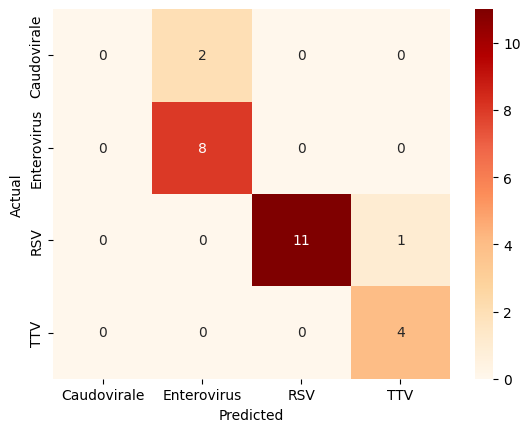

In [ ]:
cm = confusion_matrix(y_new_encoded, np.argmax(y_hat, axis=1))

df_cm = pd.DataFrame(cm, columns=np.unique(y_new), index = np.unique(y_new))

df_cm.index.name = "Actual"

df_cm.columns.name = "Predicted"

sns.heatmap(df_cm, annot=True, cmap = "OrRd")
plt.show()